<a href="https://colab.research.google.com/github/gandhias-a11y/colab/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is some information about the bike share company? We need to decide goals for improving the business.

In [ ]:
import pandas as pd
hour=pd.read_csv('hour.csv')

print(hour.describe())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  count  
0           1  0.24  0.2879  0.81        0.0       3          13     16  
1           1  0.22  0.2727  0.80        0.0       8          32     40  
2           1  0.22  0.2727  0.80        0.0       5          27     32  
3           1  0.24  0.2879  0.75        0.0       3          10     13  
4           1  0.24  0.2879  0.75        0.0       0           1      1  
          instant        season            yr          mnth            hr  \
count  173

In the above code cell, I connected Python and Colab to my csv file through Panda commands that I imported. I then printed out basic summary statistics for the different variables (columns) of data available from the file.

In [ ]:
import pandas as pd
hour=pd.read_csv('hour.csv')

print(hour.loc[hour['hr']<5,'count'].mean())
print("")
print(hour.groupby(['season'])['count'].mean())

25.919640348412475

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: count, dtype: float64


Above, I printed out the average count of riders for the overnight hours (midnight through 5AM) and then for the individual seasons.

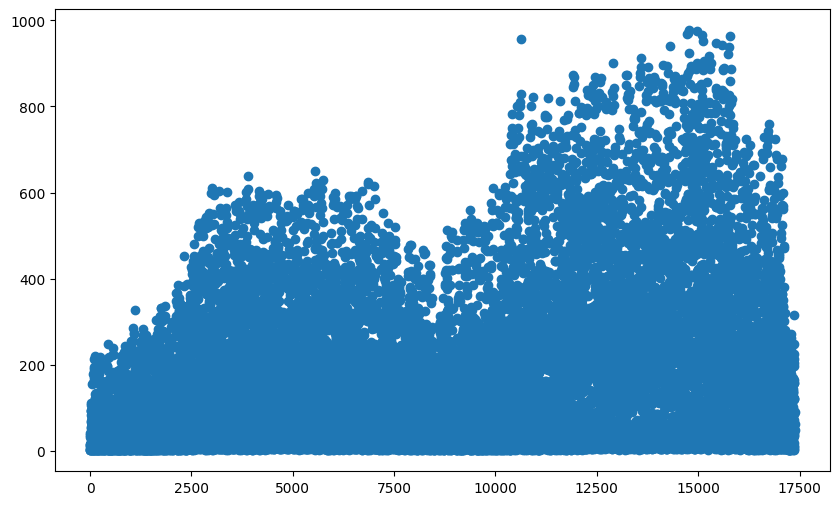

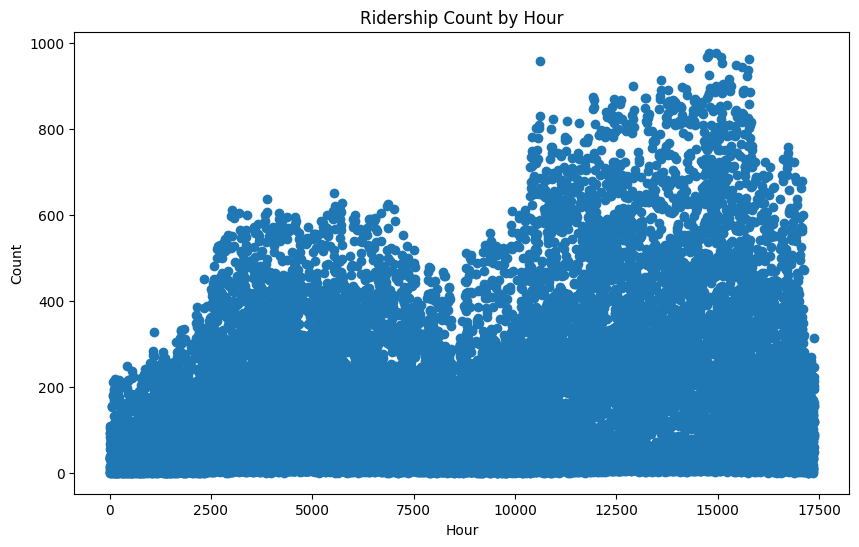

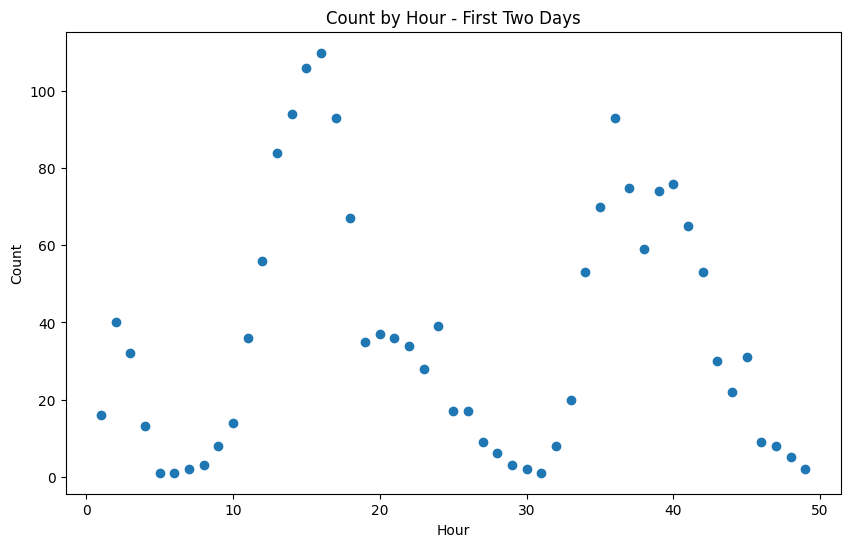

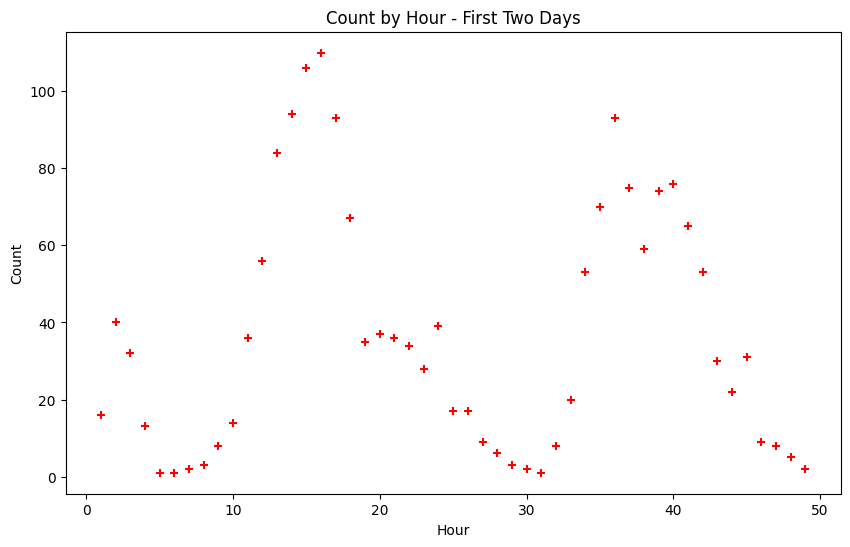

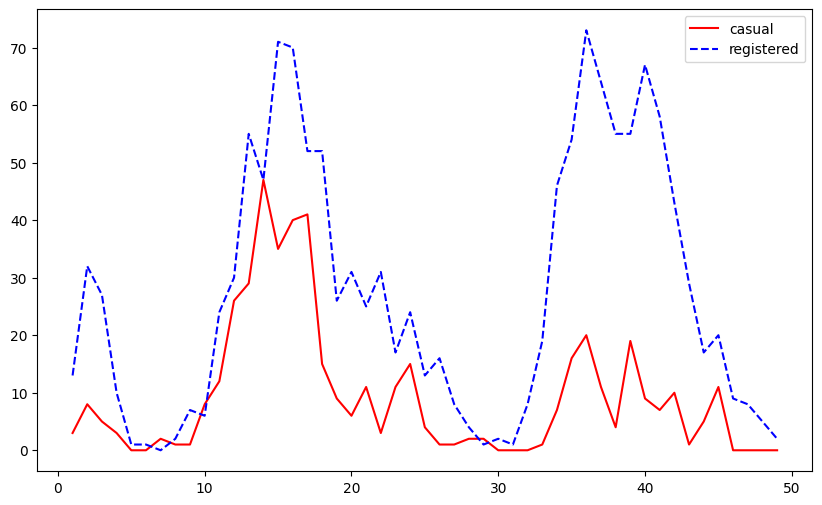

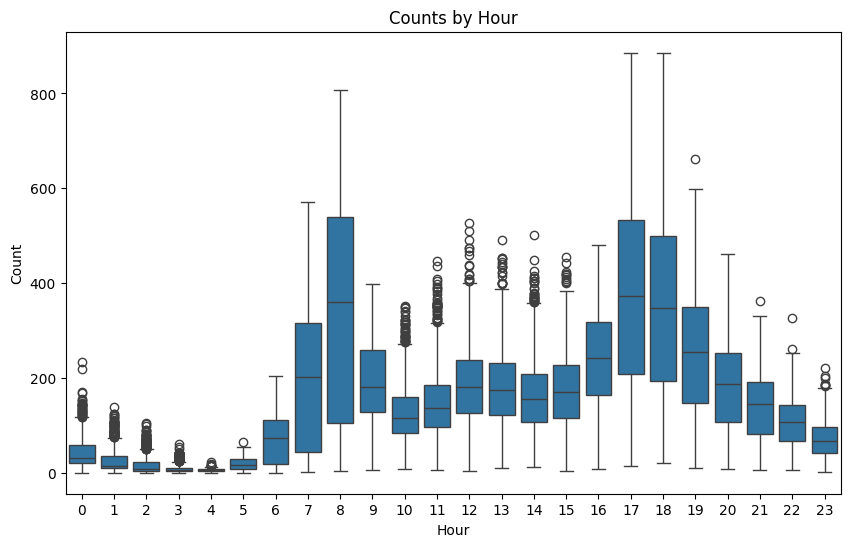

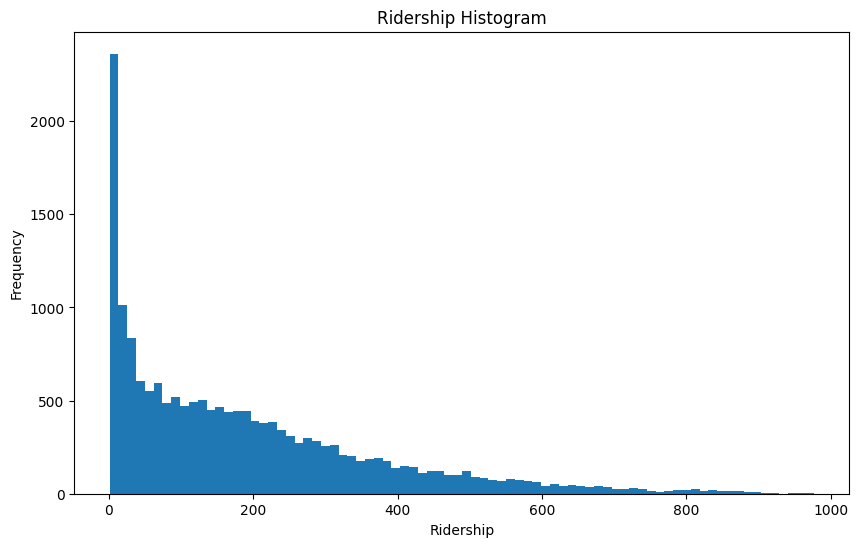

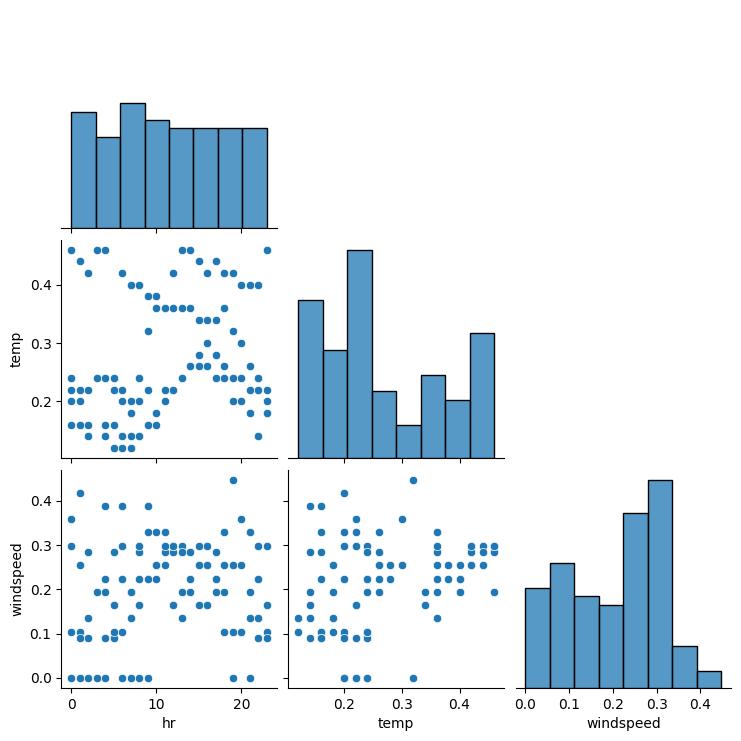

In [ ]:
import pandas as pd
hour=pd.read_csv('hour.csv')

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = hour['instant'], y = hour['count'])
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = hour['instant'], y = hour['count'])
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Ridership Count by Hour")
plt.show()

hour_first48=hour.loc[0:48,:]
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = hour_first48['instant'], y = hour_first48['count'])
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Count by Hour - First Two Days")
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = hour_first48['instant'], y = hour_first48['count'],c='red',marker='+')
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Count by Hour - First Two Days")
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(hour_first48['instant'], hour_first48['casual'],c='red',label='casual',linestyle='-')
ax.plot(hour_first48['instant'],\
hour_first48['registered'],c='blue',label='registered',linestyle='--')
ax.legend()
plt.show()

import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='hr', y='registered', data=hour)
plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Counts by Hour")
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(hour['count'],bins=80)
plt.xlabel("Ridership")
plt.ylabel("Frequency")
plt.title("Ridership Histogram")
plt.show()

thevariables=['hr','temp','windspeed']
hour_first100=hour.loc[0:100,thevariables]
sns.pairplot(hour_first100, corner=True)
plt.show()

In a variety of ways, the above charts show the change in ridership by the hours covered by the dataset. The charts use the variables 'hours' and 'count' to measure this. The first two figures are the basic scatterplot distribution of ridership by hour. The next two charts are scatters that only show the ridership count for the first two days covered by the data. The next chart is a double line graph that still shows ridership by hour for the first two days, but it splits up the riders into two cateogories: casual and registered. Next is a box plot chart that shows the distribution of rider count for each hour of the day for the all of the days included in the dataset. It includes information about max, min, 25, 50, and 75 percentiles. The second to last chart is a histogram that shows the frequency of various ridership counts. The final figure is a collection of charts (both scatter and bar graphs) that show the relationships between windspeed, temp, and hour variables using the pairplot function.

0.5066177004294634
-0.06988139105119354
                 hr      temp  windspeed
hr         1.000000  0.137603   0.137252
temp       0.137603  1.000000  -0.023125
windspeed  0.137252 -0.023125   1.000000


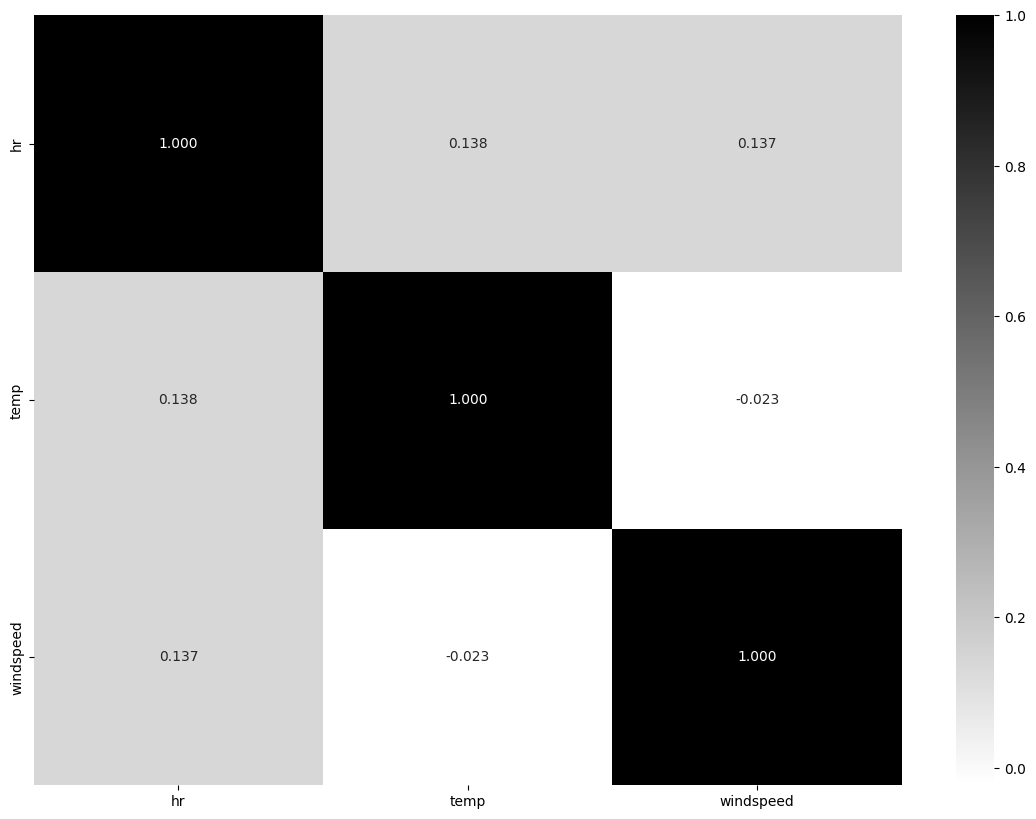

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
hour=pd.read_csv('hour.csv')

print(hour['casual'].corr(hour['registered']))
print(hour['temp'].corr(hour['hum']))

thenames=['hr','temp','windspeed']
cor_matrix = hour[thenames].corr()
print(cor_matrix)

plt.figure(figsize=(14,10))
corr = hour[thenames].corr()
sns.heatmap(corr, annot=True,cmap='binary',
 fmt=".3f",
 xticklabels=thenames,
 yticklabels=thenames)
plt.show()



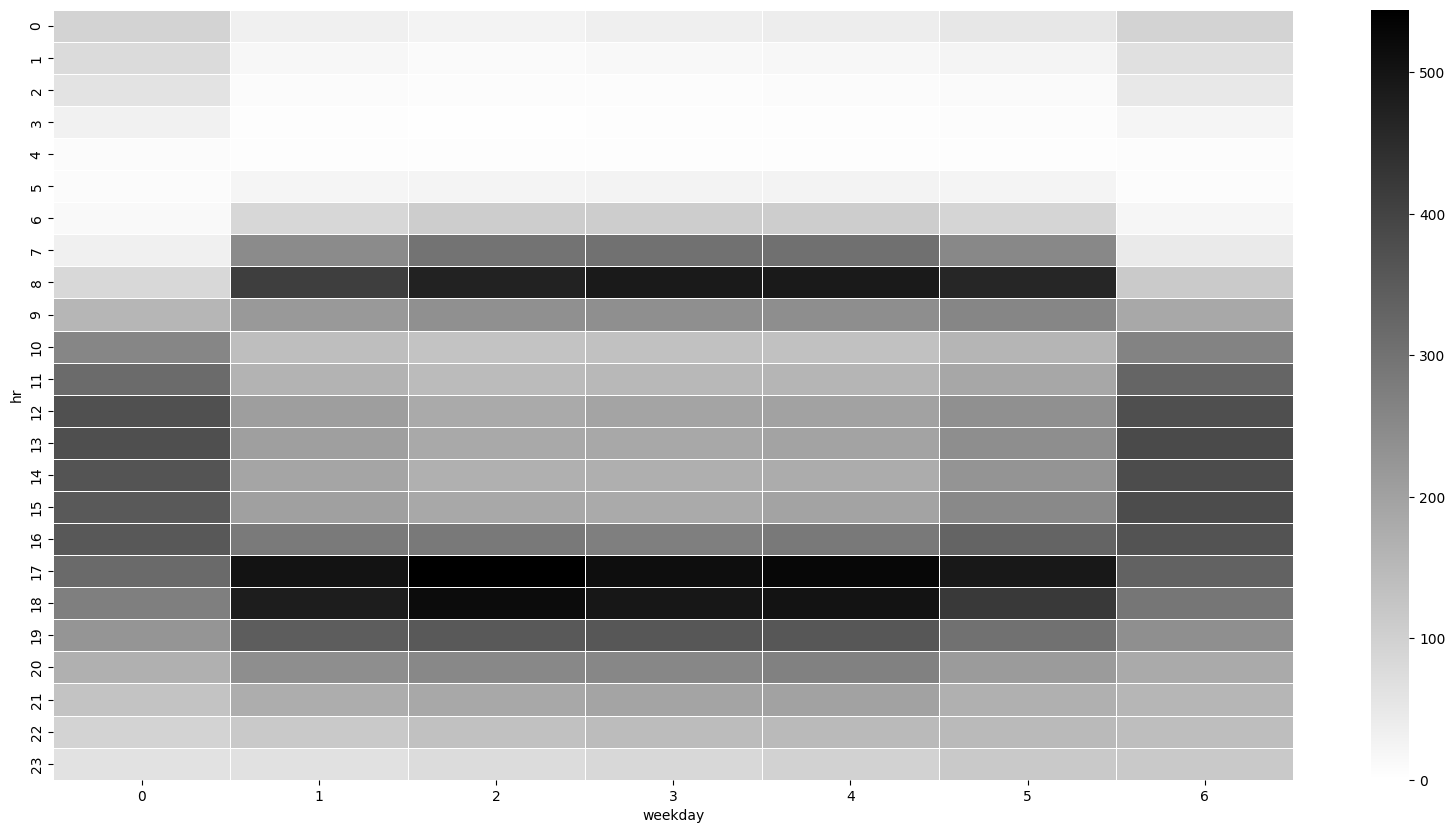

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
hour=pd.read_csv('hour.csv')

df_hm =hour.pivot_table(index = 'hr',columns ='weekday',values ='count')

plt.figure(figsize = (20,10))
sns.heatmap(df_hm, fmt="d", cmap='binary',linewidths=.5, vmin = 0)
plt.show()

The above heat map represents the average riders per weekday by the hour. The figure aggregates the rider data from the csv files and organizes it into the days of the week and breaks down each hour of the day. The lighter colored blocks show the hours where rideshares were the lowest, while the darker blocks show the most active times for the business.

Q11: I enjoyed this lab assignment because making data visualizations and interpreting unorganized data with Python was one of my goals coming into this course and my data science minor in general. Specifically, I learned which packages in Python need to be imported to accomplish tasks like getting summary statistics and creating different charts. I especially liked learning how to edit charts to include axis labels, titles, and more.